In [15]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_excel("C:/Users/user/Documents/PROJECT_PDS/RAW/military.xlsx")

In [17]:
df.describe()

year  Army_expenditure  Army_expenditure_percentage  \
count  13566.000000      1.356600e+04                 13566.000000   
mean    1995.000000      9.311164e+09                    42.790388   
std       14.720144      4.451976e+10                     8.145274   
min     1970.000000      0.000000e+00                    19.000000   
25%     1982.000000      0.000000e+00                    37.000000   
50%     1995.000000      3.890143e+07                    44.000000   
75%     2008.000000      1.216948e+09                    48.000000   
max     2020.000000      8.134204e+11                    71.000000   

       Airforce_expenditure  Airforce_expenditure_percentage  \
count          1.356600e+04                     13566.000000   
mean           8.272635e+09                        33.640469   
std            4.113951e+10                         5.604206   
min            0.000000e+00                        12.000000   
25%            0.000000e+00                        31.000000   
50%            3.188921e+07                        34.000000   
75%            9.937926e+08                        37.000000   
max            8.052208e+11                        59.000000   

       Navy_expenditure  Navy_expenditure_percentage  \
count      1.356600e+04                 13566.000000   
mean       6.178117e+09                    23.569143   
std        3.266102e+10                     8.515044   
min       -1.517953e+08                    -6.000000   
25%        0.000000e+00                    17.000000   
50%        2.071478e+07                    22.000000   
75%        6.417490e+08                    31.300000   
max        7.522515e+11                    52.000000   

       Military expenditure (current USD)  \
count                        8.769000e+03   
mean                         3.676065e+10   
std                          1.422587e+11   
min                          0.000000e+00   
25%                          1.200000e+08   
50%                          1.148446e+09   
75%                          8.533090e+09   
max                          1.928850e+12   

       Military expenditure (% of general government expenditure)  \
count                                        5282.000000            
mean                                            7.658514            
std                                             6.048938            
min                                             0.000000            
25%                                             3.665614            
50%                                             6.033675            
75%                                             9.996249            
max                                            57.478098            

       Military expenditure (% of GDP)  
count                      8777.000000  
mean                          2.710570  
std                           2.655039  
min                           0.000000  
25%                           1.327207  
50%                           2.013005  
75%                           3.218261  
max                          48.517267

In [18]:
print(f'Size of dataset: {df.shape}')
print(f'Columns:\n {list(df.columns)}')
print(f'Data types: {df.dtypes}')

Size of dataset: (13566, 14)
Columns:
 ['country', 'year', 'Army_expenditure', 'Army_expenditure_percentage', 'Airforce_expenditure', 'Airforce_expenditure_percentage', 'Navy_expenditure', 'Navy_expenditure_percentage', 'incomeLevel', 'Military expenditure (current USD)', 'Military expenditure (% of general government expenditure)', 'Military expenditure (% of GDP)', 'Country_code', 'adminregion']
Data types: country                                                        object
year                                                            int64
Army_expenditure                                              float64
Army_expenditure_percentage                                   float64
Airforce_expenditure                                          float64
Airforce_expenditure_percentage                               float64
Navy_expenditure                                              float64
Navy_expenditure_percentage                                   float64
incomeLevel                

In [19]:
countries = df.country.unique().tolist()
print(f'All countries:\n{countries}')

All countries:
['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands', 'Central African Republic', 'Central Europe and the Baltics', 'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (I

In [20]:
# Visualisation 1:Military Expenditure by branch
# group the data by year and calculate the average expenditure percentage for each military branch
military_expenditure = df.groupby('year')[['Army_expenditure', 'Airforce_expenditure', 'Navy_expenditure']].mean()

# Convert the expenditure values to billions of USD
military_expenditure = military_expenditure / 1e9

# Plot the trends in military expenditure by branch
military_expenditure.plot(kind='line', figsize=(10, 6))
plt.title('Trends in Military Expenditure by Branch', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Expenditure in billions of USD', fontsize=12)
plt.legend(fontsize=12)
plt.show()

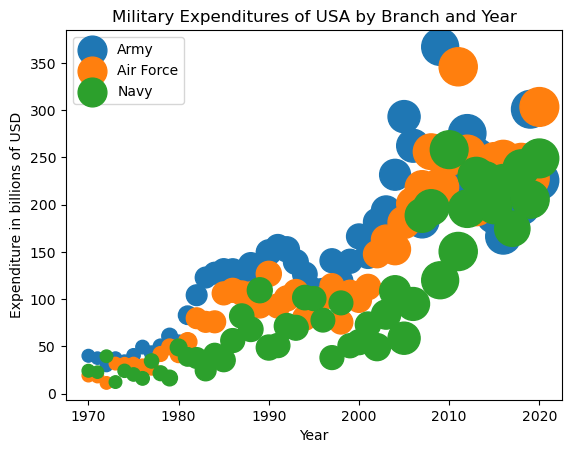

In [21]:
#Visualisation 2:Military Expenditures of USA by Branch and Year

usa_df = df.loc[(df['country'] == 'United States') & (df['Military expenditure (current USD)'].notnull()), :]
# Create a pivot table to aggregate the data by year and military branch
usa_pivot = usa_df.pivot_table(index='year', values=['Army_expenditure', 'Airforce_expenditure', 'Navy_expenditure', 'Military expenditure (current USD)'], aggfunc='sum')
# Scale the size of the bubbles to correspond to total military expenditures in USD
bubble_sizes = usa_pivot['Military expenditure (current USD)'] / 1000000000
# Plot the bubble chart
plt.scatter(x=usa_pivot.index, y=usa_pivot['Army_expenditure']/1e9, s=bubble_sizes, label='Army')
plt.scatter(x=usa_pivot.index, y=usa_pivot['Airforce_expenditure']/1e9, s=bubble_sizes, label='Air Force')
plt.scatter(x=usa_pivot.index, y=usa_pivot['Navy_expenditure']/1e9, s=bubble_sizes, label='Navy')
plt.xlabel('Year')
plt.ylabel('Expenditure in billions of USD')
plt.title('Military Expenditures of USA by Branch and Year')
plt.legend()
plt.show()


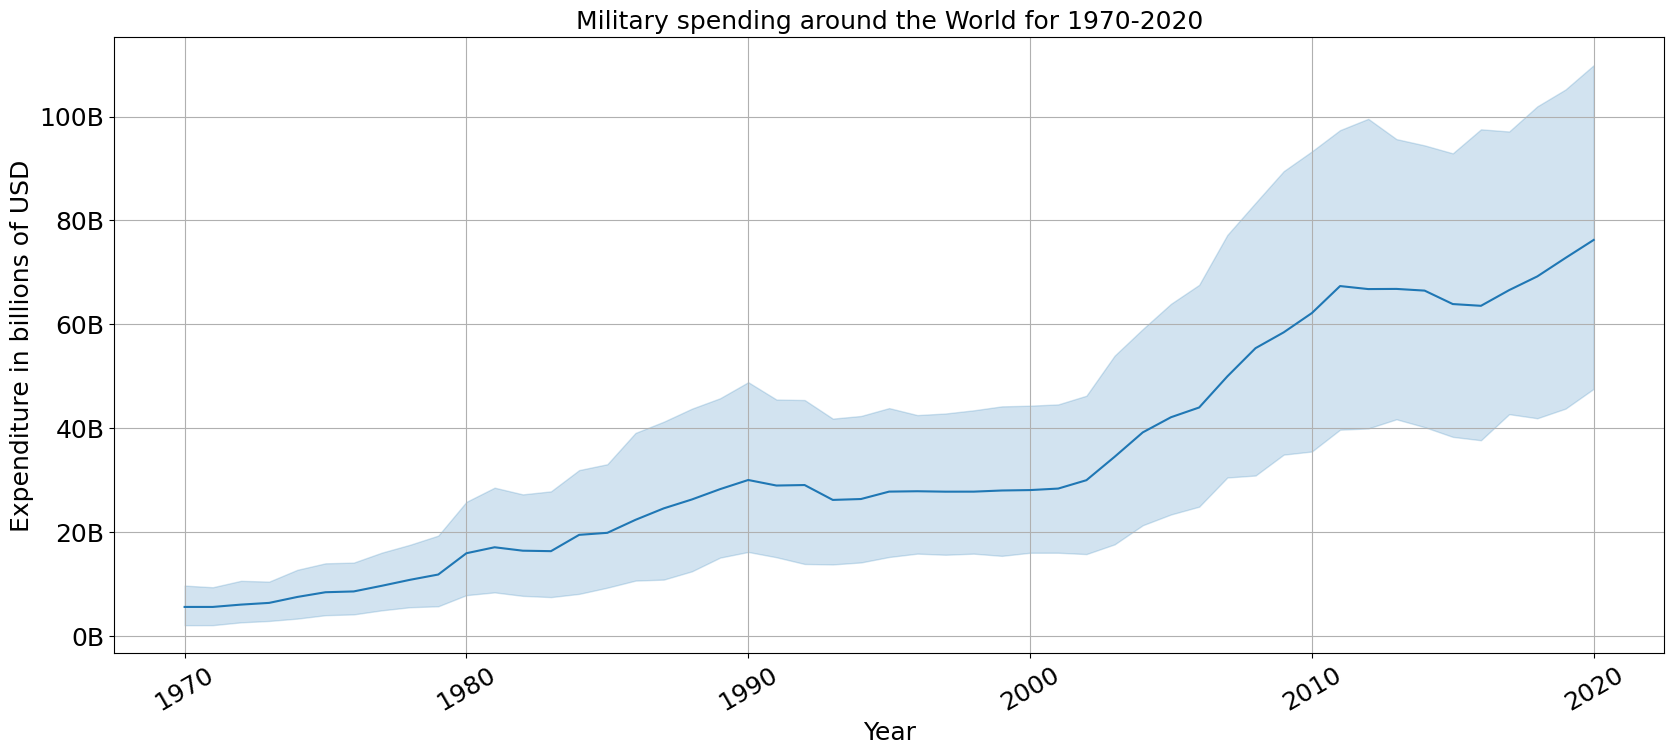

In [22]:
 
#Visualisation 3:Military spending around the World for 1970-2020
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

military_expenditure = military_expenditure / 1e9
rf = df.loc[df['incomeLevel'] != 'Aggregates', :]

plt.figure(figsize=(20,8))
years = [i for i in range(df['year'].min(), df['year'].max() + 1)]
plt.grid()
world_military_expenditure = df[df['country'] == 'World']['Military expenditure (current USD)']
sns.lineplot(data=df, x='year', y='Military expenditure (current USD)')
plt.title('Military spending around the World for 1970-2020', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Expenditure in billions of USD', fontsize=18)
plt.xticks(rotation=30, fontsize=18)
plt.yticks(fontsize=18)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0f}B'.format(y/1e9))) # format y-axis values in billions
plt.show()



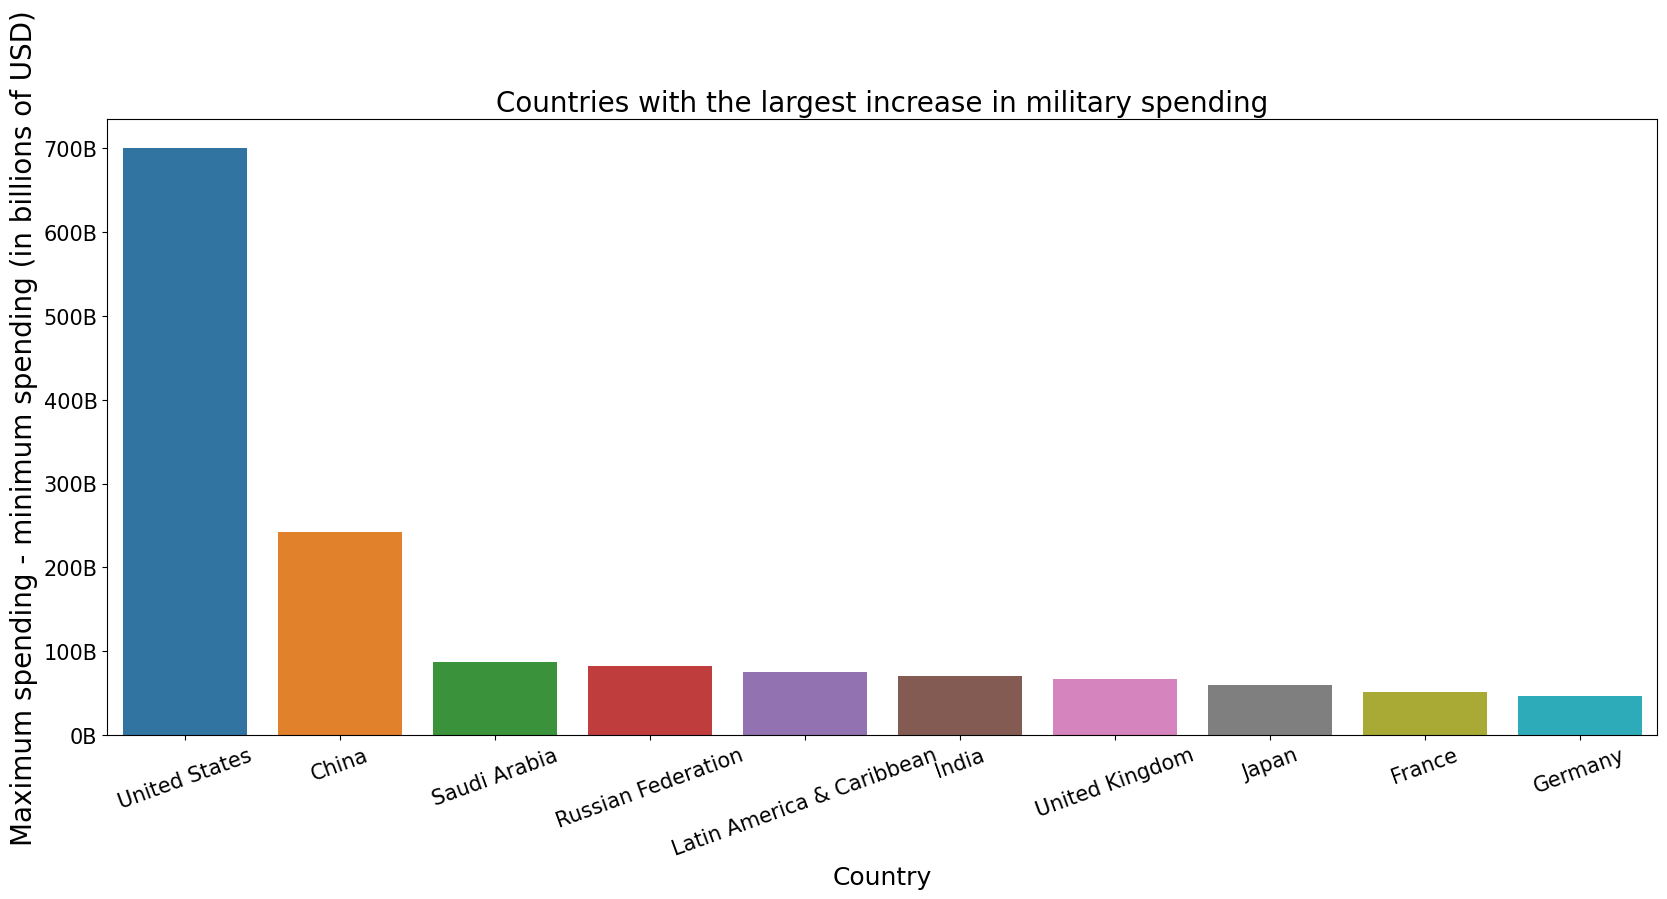

In [23]:
# Visualisation 4:Bar plot of countries with the largest increase in military spending
import matplotlib.ticker as ticker

max_min = rf.groupby('country').max()['Military expenditure (current USD)'] - rf.groupby('country').min()['Military expenditure (current USD)']
top_10 = max_min.nlargest(10)
plt.figure(figsize=(20, 8))
plt.title('Countries with the largest increase in military spending', fontsize=20)
plt.ylabel('Maximum spending - minimum spending (in billions of USD)', fontsize=20)
sns.barplot(x=top_10.index, y=top_10.values)
plt.xticks(rotation=20, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Country', fontsize=18)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0f}B'.format(y/1e9))) # format y-axis values in billions
plt.show()


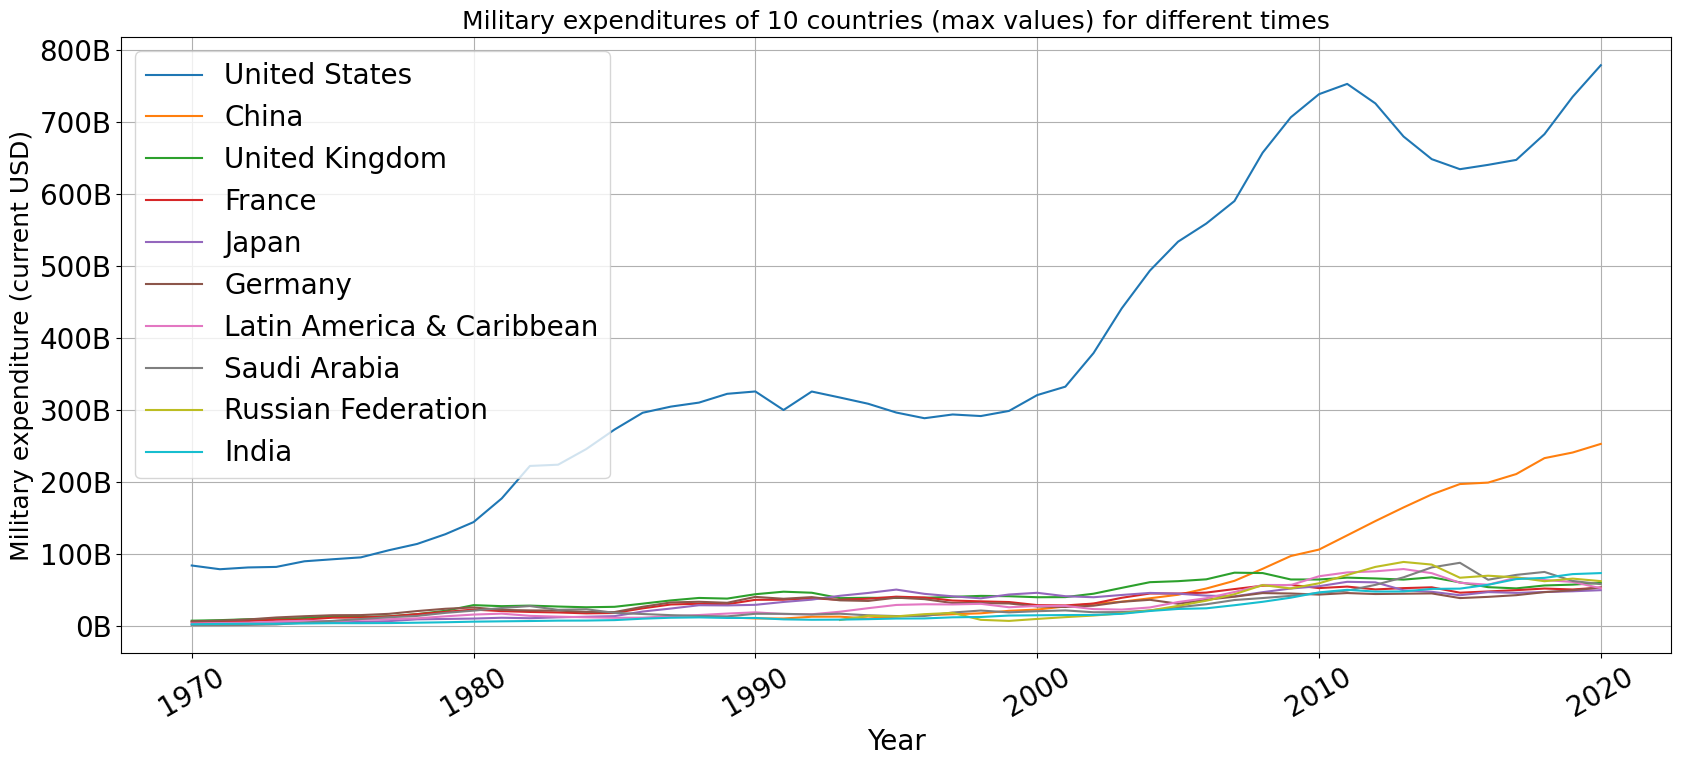

In [24]:
# Visualisation 5:Line plot of military expenditures of the top 10 countries
top_10 = rf.groupby('country')['Military expenditure (current USD)'].sum().nlargest(10)
top_10 = list(top_10.index)

def plotter_1(top_10):
    plt.figure(figsize=(20, 8))
    plt.title('Military expenditures of 10 countries (max values) for different times', fontsize=18)
    YEARS = [i for i in range(df['year'].min(), df['year'].max() + 1)]
    for top_country in top_10:
        EXPENDITURE = df.loc[df['country'] == top_country, 'Military expenditure (current USD)']
        sns.lineplot(x=YEARS, y=EXPENDITURE, label=top_country)
    plt.legend(fontsize=20)
    plt.xticks(rotation=30, fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('Year', fontsize=20)
    plt.ylabel('Military expenditure (current USD)', fontsize=18)
    plt.grid()
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0f}B'.format(y/1e9))) # format y-axis values in billions
    
plotter_1(top_10)
plt.show()


In [25]:
# Visualisation 6:Line plot of military expenditures of the 5 countries with the lowest spending
tf = df.loc[df['Military expenditure (current USD)'] > 0,:]
smallest_5 = tf.groupby('country')['Military expenditure (current USD)'].sum().nsmallest(5)
smallest_5 = list(smallest_5.index)

def plotter_10(smallest_5):
    plt.figure(figsize=(15, 6))
    plt.title('5 countries with the lowest military spending for the period 1970-2020', fontsize=18)
    YEARS = [i for i in range(df['year'].min(), df['year'].max() + 1)]
    for top_country in smallest_5:
        EXPENDITURE = df.loc[df['country'] == top_country, 'Military expenditure (current USD)']
        sns.lineplot( x=YEARS, y=EXPENDITURE, label=top_country)
    plt.legend(fontsize=12)
    plt.xticks(rotation=40, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Military expenditure (current USD)', fontsize=18)
    plt.grid()
    
plotter_10(smallest_5)
plt.show()



In [26]:
def plotter_2(Income, n):
    fig, ax = plt.subplots(figsize=(20, 8))
    hf = df.loc[df['incomeLevel'] == Income, ['country','Military expenditure (% of GDP)']]
    random.choices(hf['country'].tolist(), k=n)
    hf = hf.loc[hf['country'].isin(random.choices(hf['country'].tolist(), k=n)), :]
    group = hf.groupby('country')
    max_Military_expenditure = group.max()['Military expenditure (% of GDP)']
    min_Military_expenditure = group.min()['Military expenditure (% of GDP)']
    ax.set_title(f'Analysis of {Income} countries', fontsize=17)
    width = 0.3
    x = np.arange(len(max_Military_expenditure.index.tolist()))
    ax.bar(x - width/2, max_Military_expenditure.values, width=0.3, label='Maximum % of GDP')
    ax.bar(x + width/2, min_Military_expenditure.values, width=0.3, label='Minimum % of GDP')
    ax.set_xticks(x)
    ax.set_xticklabels(max_Military_expenditure.index.tolist(), rotation=90, fontsize=13)
    plt.grid()
    ax.legend(fontsize=15, loc=1)
    ax.set_xlabel('Country', fontsize=16)
    ax.set_ylabel('Military expenditure (% of GDP)', fontsize=16)
    plt.yticks(fontsize=15)
    plt.show()

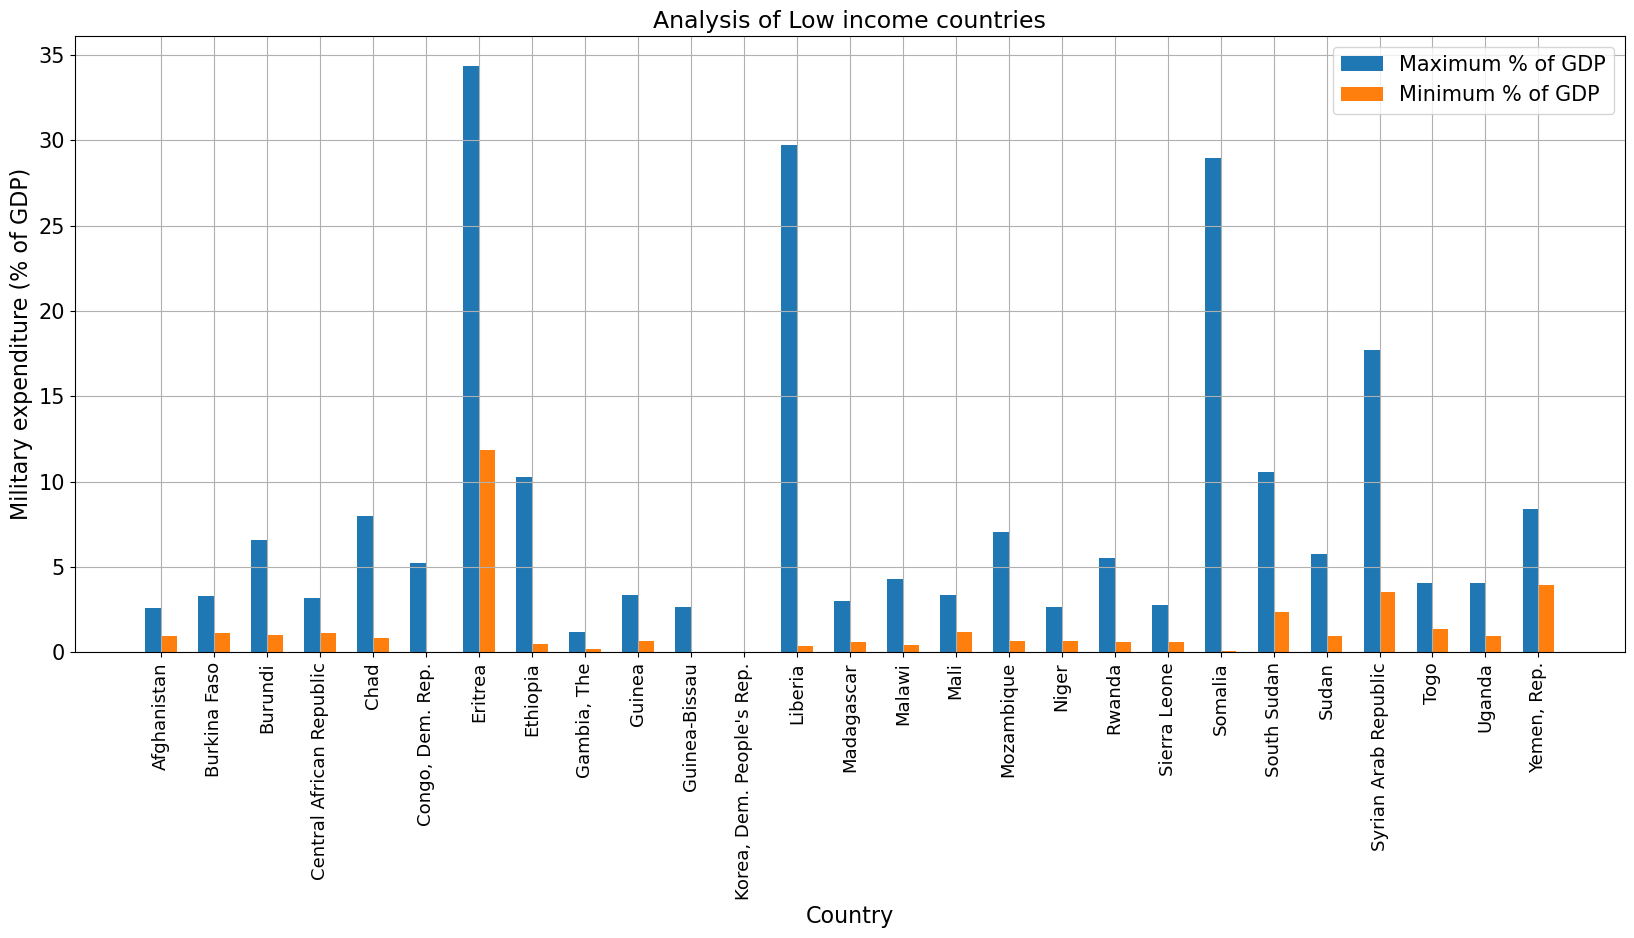

<Figure size 2000x1000 with 0 Axes>

In [27]:
plotter_2('High income', 100)  
plotter_2('Low income', 100)

income_level_list = df['incomeLevel'].dropna().unique().tolist()
income_level_list.remove('Not classified')
income_level_list.remove('Aggregates')

ef = pd.DataFrame(df.groupby('incomeLevel')['Military expenditure (current USD)'].sum())
ef.drop(index=['Aggregates', 'Not classified'], inplace=True)
explode = (0.05, 0.05, 0.05, 0.05)
plt.figure(figsize=(8,9))
plt.title('''The ratio of the total military spending of
countries with different levels of income of the population for the period 1970-2020''', fontsize=12)
plt.pie(ef['Military expenditure (current USD)'], labels=income_level_list, autopct='%1.1f%%', shadow=False,
        wedgeprops={'lw':1, 'ls':'--','edgecolor':'k'}, rotatelabels=True, explode=explode,
        colors = sns.color_palette('pastel')[0:10], textprops={'fontsize': 10})
plt.show()

df_update = df[df['country'].isin(['Low income', 'Lower middle income','Upper middle income', 'High income'])]
df_update = df_update.loc[:, ['country', 'year', 'Military expenditure (% of general government expenditure)']]

plt.figure(figsize=(20, 10))

def plotter_3(income_level):
    plt.title('Military expenditure (% of general government expenditure)')


In [28]:
plt.figure(figsize=(20, 10))
def plotter_3(income_level):
    plt.title('Military expenditure (% of general government expenditure) for countries with different income levels', fontsize=17)
    plt.xlabel('Year', fontsize=17)
    plt.ylabel('Military expenditure (% of general government expenditure)', fontsize=12)
    plt.grid()
    years = [i for i in range(df['year'].min(), df['year'].max() + 1)]
    sns.lineplot(x=years, y=df_update[df_update['country'] == income_level]['Military expenditure (% of general government expenditure)'],
                 label=f'{income_level} level')
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    plt.legend(fontsize=17)

    
plt.grid()
    
plotter_3('High income')
plotter_3('Lower middle income')
plotter_3('Upper middle income')
plotter_3('Low income')

In [30]:
import plotly.graph_objs as go

data = dict(
        type = 'choropleth',
        locations = df['Country_code'],
        z = df[df['year'] == 2020]['Military expenditure (current USD)'],
        text = df['country'],
        colorbar = {'title': 'Military Expenditure (USD)'},
        colorscale = 'Blues'
      )

layout = dict(title = 'Global Military Expenditure in 2020',
                geo = dict(showframe = False,
                          projection = {'type':'natural earth'})
             )

fig = go.Figure(data=[data], layout=layout)
fig.show(renderer='notebook')
